<a href="https://colab.research.google.com/github/bjpark-forest/2023-1-Intro-DataScience/blob/main/%EC%A0%95%EC%9D%B5%EC%B0%AC_2022%EB%85%84_%EB%B3%B5%EC%A7%80_%ED%8C%A8%EB%84%90_%EC%A1%B0%EC%82%AC_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#2022년 복지 패널 조사 데이터 분석

In [ ]:
pip install pyreadstat

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
raw_welfare = pd.read_csv('Koweps_hpwc17_2022_beta1.csv')

welfare = raw_welfare.copy()

<ipython-input-172-4237f527337f>:1: DtypeWarning: Columns (830,833,835) have mixed types. Specify dtype option on import or set low_memory=False.
  raw_welfare = pd.read_csv('Koweps_hpwc17_2022_beta1.csv')


In [ ]:
welfare
welfare.shape
welfare.info()
welfare.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16591 entries, 0 to 16590
Columns: 844 entries, Unnamed: 0 to h17_pers_income5
dtypes: float64(839), int64(1), object(4)
memory usage: 106.8+ MB


,Unnamed: 0,h17_id,h17_ind,h17_sn,h17_merkey,h_new,h_new1,h17_cobf,p17_wsc,p17_wsl,...,wc17_63,wc17_64,wc17_5aq4,wc17_5aq5,wc17_5aq6,h17_pers_income1,h17_pers_income2,h17_pers_income3,h17_pers_income4,h17_pers_income5
count,16591.000000,16591.000000,16591.000000,16591.000000,1.659100e+04,16591.000000,16591.000000,166.000000,10140.000000,10140.000000,...,2829.000000,2829.000000,2829.000000,2829.000000,2829.000000,2938.000000,4197.000000,1147.000000,16591.000000,934.000000
mean,8295.000000,6157.937135,6.818817,1.004822,6.158005e+07,0.626183,0.237358,2.433735,1.000000,1.000000,...,2.961117,3.602686,3.354542,3.994344,3.229056,4613.847515,1498.525852,3178.074978,2.883612,1599.821199
std,4789.553493,3646.361509,6.690917,0.135726,3.646412e+07,0.841924,0.425476,2.025251,0.912506,1.049129,...,2.185179,2.320304,1.034995,0.929995,1.142216,2817.178208,1734.794652,3807.461768,49.028387,4552.854552
min,0.000000,2.000000,1.000000,1.000000,2.010100e+04,0.000000,0.000000,1.000000,0.006721,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,18.000000,-8955.000000,0.000000,-12993.000000
25%,4147.500000,3000.000000,1.000000,1.000000,3.000010e+07,0.000000,0.000000,1.000000,0.334383,0.228336,...,1.000000,2.000000,3.000000,3.000000,2.000000,2820.000000,300.000000,884.000000,0.000000,283.250000
50%,8295.000000,5739.000000,4.000000,1.000000,5.739010e+07,0.000000,0.000000,2.000000,0.739104,0.692788,...,2.000000,3.000000,3.000000,4.000000,3.000000,3938.500000,1070.000000,2363.000000,0.000000,647.000000
75%,12442.500000,9639.000000,16.000000,1.000000,9.639070e+07,1.000000,0.000000,2.000000,1.359835,1.407686,...,5.000000,5.000000,4.000000,5.000000,4.000000,5888.000000,2250.000000,4655.000000,0.000000,1512.250000
max,16590.000000,12011.000000,17.000000,9.000000,1.201117e+08,2.000000,1.000000,7.000000,5.173948,5.742388,...,9.000000,9.000000,6.000000,6.000000,9.000000,43512.000000,64800.000000,44628.000000,4500.000000,106959.000000


In [ ]:
welfare = welfare.rename(
    columns = {'h17_g3' : 'sex',
               'h17_g4' : 'birth',
               'h17_g10' : 'marriage_type',
               'h17_g11' : 'religion',
               'p1702_8aq1' : 'income',
               'h17_eco9' : 'code_job',
               'h17_reg7' : 'code_region',
               'p1702_8' : 'worktime'})

##성별 데이터 분석

In [ ]:
welfare['sex'].dtypes

dtype('float64')

In [ ]:
welfare['sex'].value_counts()

2.0    9120
1.0    7471
Name: sex, dtype: int64

In [ ]:
welfare['sex'] = np.where(welfare['sex'] == 9, np.nan, welfare['sex'])

In [ ]:
welfare['sex'].isna().sum()

0

In [ ]:
welfare['sex'] = np.where(welfare['sex'] == 1, 'male', 'female')

In [ ]:
welfare['sex'].value_counts()

female    9120
male      7471
Name: sex, dtype: int64

<Axes: xlabel='sex', ylabel='count'>

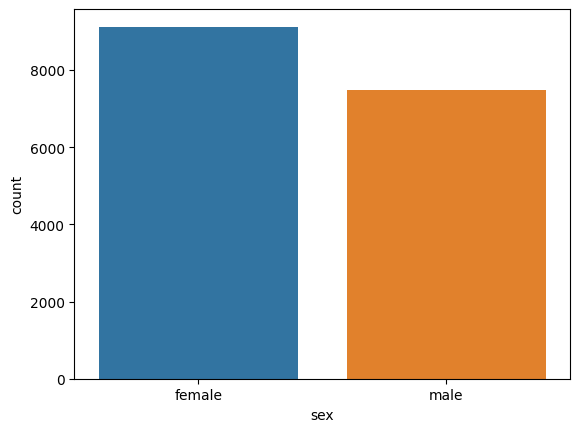

In [ ]:
sns.countplot(data = welfare, x = 'sex')

##근무시간 데이터 분석

In [ ]:
welfare['worktime'].dtypes

dtype('float64')

In [ ]:
welfare['worktime'].describe()

count    6720.000000
mean       37.058631
std        15.447846
min         0.000000
25%        30.000000
50%        40.000000
75%        44.000000
max        98.000000
Name: worktime, dtype: float64

<Axes: xlabel='worktime', ylabel='Count'>

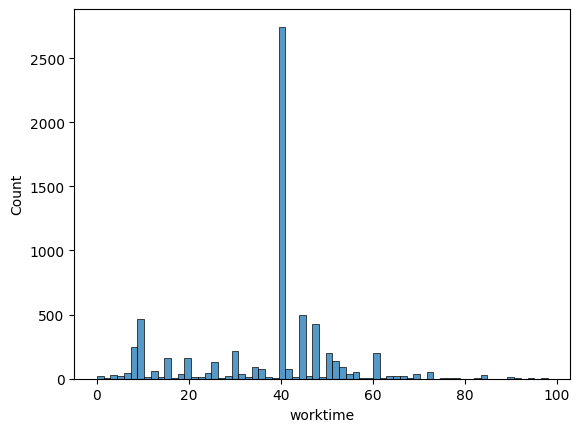

In [ ]:
sns.histplot(data = welfare, x = 'worktime')

In [ ]:
welfare['worktime'].isna().sum()

9871

In [ ]:
welfare['worktime'] = np.where(welfare['worktime'] == 999, np.nan,
                             welfare['worktime'])

In [ ]:
welfare['worktime'].isna().sum()

9871

###성별과 근무시간 데이터의 연관성

In [ ]:
sex_worktime = welfare.dropna(subset = ['worktime']) \
                    .groupby('sex', as_index = False) \
                    .agg(mean_worktime = ('worktime', 'mean'))

sex_worktime

,sex,mean_worktime
0,female,32.546950
1,male,41.527547


<Axes: xlabel='sex', ylabel='mean_worktime'>

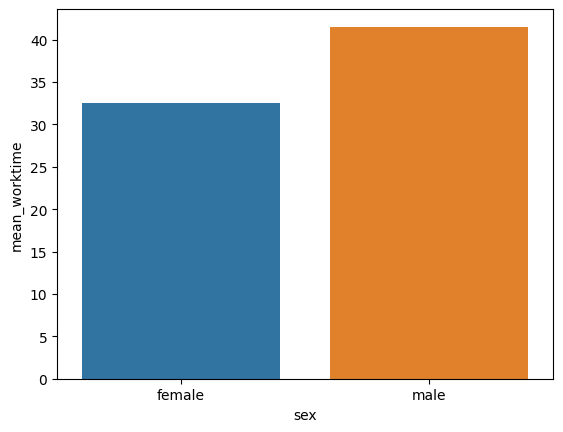

In [ ]:
sns.barplot(data = sex_worktime, x = 'sex', y = 'mean_worktime')

##수입 데이터 분석

In [ ]:
welfare['income'].dtypes

dtype('float64')

In [ ]:
welfare['income'].describe()

count    5633.000000
mean      275.647080
std       214.807673
min         0.000000
25%       125.000000
50%       236.000000
75%       363.000000
max      2017.000000
Name: income, dtype: float64

<Axes: xlabel='income', ylabel='Count'>

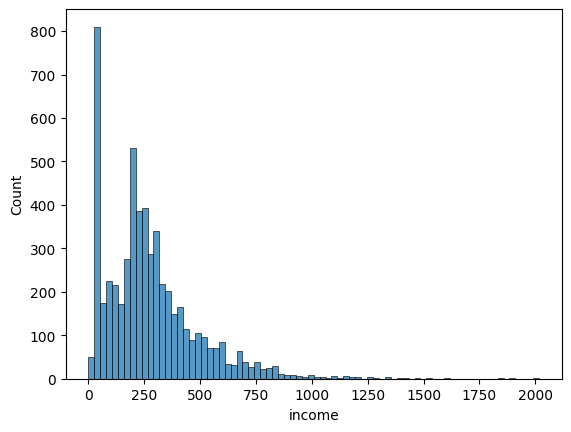

In [ ]:
sns.histplot(data = welfare, x = 'income')

In [ ]:
welfare['income'].describe()

count    5633.000000
mean      275.647080
std       214.807673
min         0.000000
25%       125.000000
50%       236.000000
75%       363.000000
max      2017.000000
Name: income, dtype: float64

In [ ]:
welfare['income'].isna().sum()

10958

In [ ]:
welfare['income'] = np.where(welfare['income'] == 9999, np.nan,
                             welfare['income'])

In [ ]:
welfare['income'].isna().sum()

10958

###성별과 수입 데이터의 연관성

In [ ]:
sex_income = welfare.dropna(subset = ['income']) \
                    .groupby('sex', as_index = False) \
                    .agg(mean_income = ('income', 'mean'))

sex_income

,sex,mean_income
0,female,190.617382
1,male,365.106375


<Axes: xlabel='sex', ylabel='mean_income'>

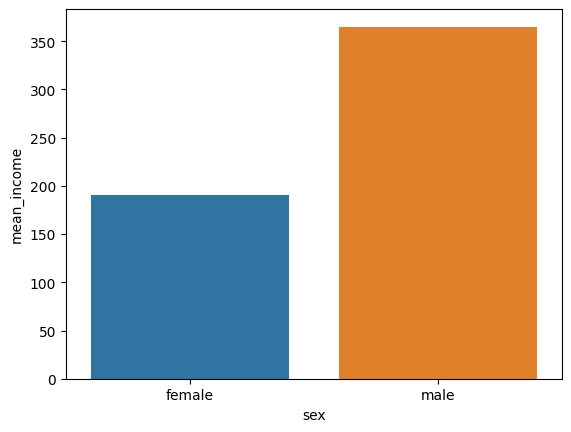

In [ ]:
sns.barplot(data = sex_income, x = 'sex', y = 'mean_income')

##출생 데이터 분석

In [ ]:
welfare['birth'].dtype

dtype('float64')

In [ ]:
welfare['birth'].describe()

count    16591.000000
mean      1969.066241
std         24.158054
min       1906.000000
25%       1949.000000
50%       1965.000000
75%       1988.000000
max       2021.000000
Name: birth, dtype: float64

<Axes: xlabel='birth', ylabel='Count'>

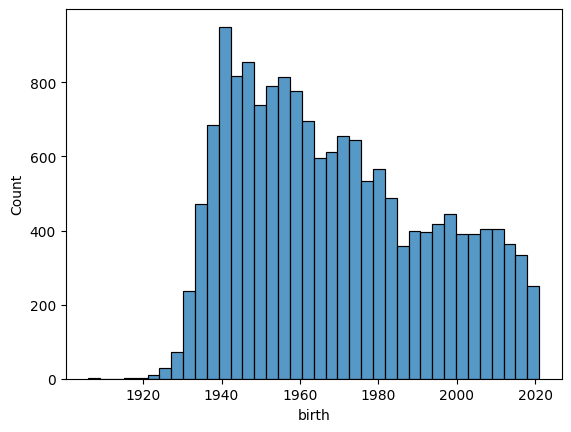

In [ ]:
sns.histplot(data = welfare, x = 'birth')

In [ ]:
welfare['birth'].describe()

count    16591.000000
mean      1969.066241
std         24.158054
min       1906.000000
25%       1949.000000
50%       1965.000000
75%       1988.000000
max       2021.000000
Name: birth, dtype: float64

In [ ]:
welfare['birth'].isna().sum()

0

In [ ]:
welfare['birth'] = np.where(welfare['birth'] == 9999, np.nan,
                            welfare['birth'])

welfare['birth'].isna().sum()

0

In [ ]:
welfare = welfare.assign(age = 2019 - welfare['birth'] + 1)
welfare['age'].describe()

count    16591.000000
mean        50.933759
std         24.158054
min         -1.000000
25%         32.000000
50%         55.000000
75%         71.000000
max        114.000000
Name: age, dtype: float64

<Axes: xlabel='age', ylabel='Count'>

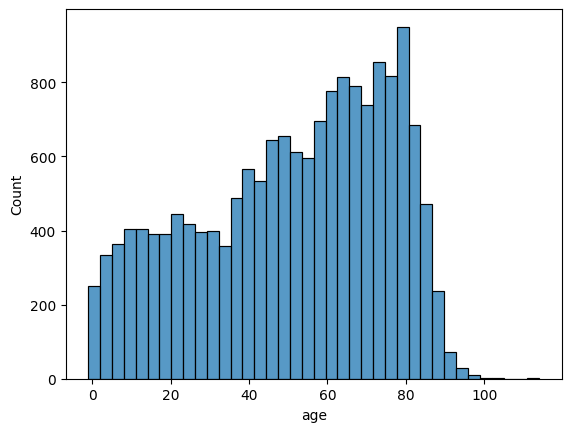

In [ ]:
sns.histplot(data = welfare, x = 'age')

###출생과 수입 데이터 연관성

In [ ]:
age_income = welfare.dropna(subset = ['income']) \
                    .groupby('age') \
                    .agg(mean_income = ('income', 'mean'))
age_income.head()

,mean_income
age,
17.0,171.666667
18.0,132.555556
19.0,149.409091
20.0,149.810811
21.0,166.413043


<Axes: xlabel='age', ylabel='mean_income'>

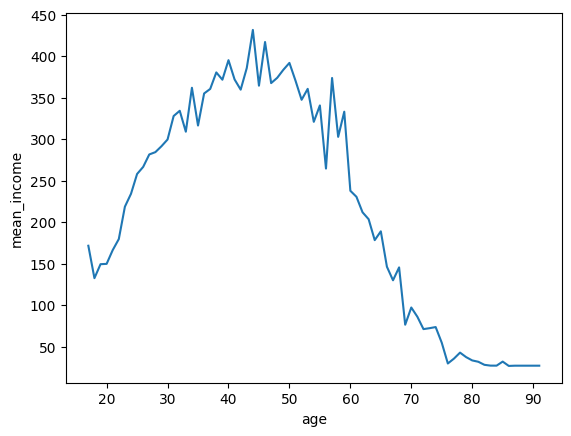

In [ ]:
sns.lineplot(data = age_income, x = 'age', y = 'mean_income')

In [ ]:
welfare['age'].head()

0    75.0
1    72.0
2    78.0
3    58.0
4    57.0
Name: age, dtype: float64

In [ ]:
welfare = welfare.assign(ageg = np.where(welfare['age'] < 30, 'young',
                                np.where(welfare['age'] <= 59, 'middle',
                                                               'old')))

In [ ]:
welfare['ageg'].value_counts()

old       7255
middle    5544
young     3792
Name: ageg, dtype: int64

<Axes: xlabel='ageg', ylabel='count'>

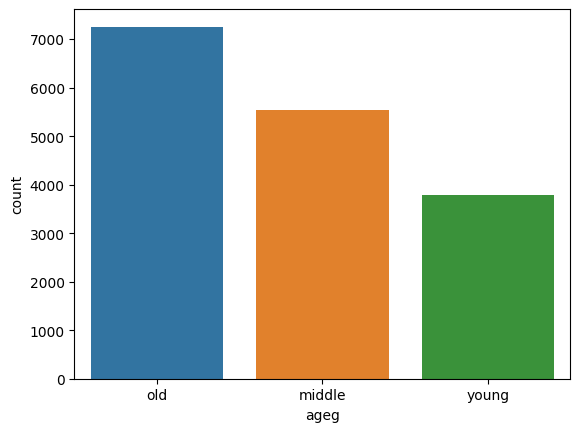

In [ ]:
sns.countplot(data = welfare, x = 'ageg')

In [ ]:
ageg_income = welfare.dropna(subset = ['income']) \
                     .groupby('ageg', as_index = False) \
                     .agg(mean_income = ('income', 'mean'))

ageg_income

,ageg,mean_income
0,middle,359.709845
1,old,116.186375
2,young,240.861809


<Axes: xlabel='ageg', ylabel='mean_income'>

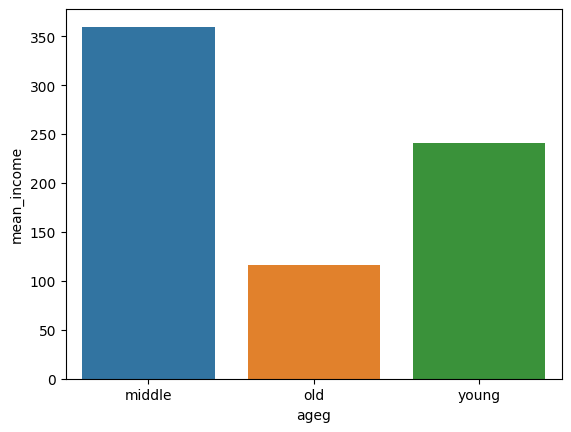

In [ ]:
sns.barplot(data = ageg_income, x = 'ageg', y = 'mean_income')

<Axes: xlabel='ageg', ylabel='mean_income'>

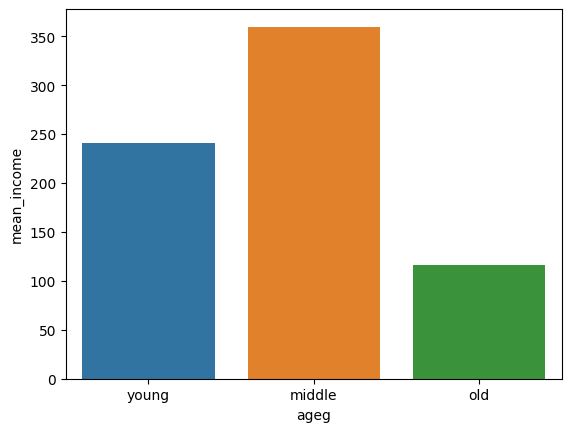

In [ ]:
sns.barplot(data = ageg_income, x = 'ageg', y = 'mean_income',
            order = ['young', 'middle', 'old'])